In [1]:
import os
os.getenv("OPENAI_API_KEY")
print("API Key retrieved successfully.")

API Key retrieved successfully.


In [5]:
from agents import Agent, Runner, function_tool, ItemHelpers

@function_tool
def get_weather(city: str):
    return f"The current weather in {city} is sunny with a temperature of 25°C."

agent = Agent(
    name="Assistant Agent",
    instructions="You are a helpful assistant. Use tools when needed to answer questions",
    tools=[get_weather],
)

# result = await Runner.run(agent, "Hello how are you? what is the weather capital of korea?")
stream = Runner.run_streamed(agent, "Hello how are you? what is the weather capital of korea?")

# print(result.final_output)
async for event in stream.stream_events():
    
    if event.type == "raw_response_event":
        continue
    elif event.type == "agent_updated_stream_event":
        print("Agent updated to", event.new_agent.name)
    elif event.type == "run_item_stream_event":
        if event.item.type == "tool_call_item":
            print(event.item.raw_item.to_dict())
        elif event.item.type == "tool_call_output_item":
            print(event.item.output)
        elif event.item.type == "message_output_item":
            print(ItemHelpers.text_message_output(event.item))
    print("=" * 20)

Agent updated to Assistant Agent
{'arguments': '{"city":"Seoul"}', 'call_id': 'call_T7PLDZx8pFMY4CErtdbr7FTF', 'name': 'get_weather', 'type': 'function_call', 'id': 'fc_0a6572fdff1c41da006929ac07f3f0819e95cb59e64d1a5ebc', 'status': 'completed'}
The current weather in Seoul is sunny with a temperature of 25°C.
Hello! I'm doing well, thanks for asking.

The current weather in Seoul, the capital of South Korea, is sunny with a temperature of 25°C. If you need more details or a forecast, just let me know!


In [6]:
from agents import Agent, Runner, function_tool, SQLiteSession

@function_tool
def get_weather(city: str):
    return f"The current weather in {city} is sunny with a temperature of 25°C."

agent = Agent(
    name="Assistant Agent",
    instructions="You are a helpful assistant. Use tools when needed to answer questions",
    tools=[get_weather],
)

# result = await Runner.run(agent, "Hello how are you? what is the weather capital of korea?")
stream = Runner.run_streamed(agent, "Hello how are you? what is the weather capital of korea?")

message = ""
args = ""

# print(result.final_output)
async for event in stream.stream_events():

    if event.type == "raw_response_event":
        event_type = event.data.type
        if event_type == "response.output_text.delta":
            message += event.data.delta
            print(message)
        elif event_type == "response.function_call_arguments.delta":
            args += event.data.delta
            print(args)
        elif event_type == "response.completed":
            message = ""
            args = ""

{"
{"city
{"city":"
{"city":"Se
{"city":"Seoul
{"city":"Seoul"}
Hello
Hello!
Hello! I'm
Hello! I'm doing
Hello! I'm doing well
Hello! I'm doing well,
Hello! I'm doing well, thank
Hello! I'm doing well, thank you
Hello! I'm doing well, thank you.
Hello! I'm doing well, thank you. The
Hello! I'm doing well, thank you. The current
Hello! I'm doing well, thank you. The current weather
Hello! I'm doing well, thank you. The current weather in
Hello! I'm doing well, thank you. The current weather in Seoul
Hello! I'm doing well, thank you. The current weather in Seoul,
Hello! I'm doing well, thank you. The current weather in Seoul, the
Hello! I'm doing well, thank you. The current weather in Seoul, the capital
Hello! I'm doing well, thank you. The current weather in Seoul, the capital of
Hello! I'm doing well, thank you. The current weather in Seoul, the capital of South
Hello! I'm doing well, thank you. The current weather in Seoul, the capital of South Korea
Hello! I'm doing well, thank you.

In [7]:
from agents import Agent, Runner, function_tool, SQLiteSession

session = SQLiteSession("user_1", "ai-memory.db")


@function_tool
def get_weather(city: str):
    """Get weather by city"""
    return "30 degrees"


agent = Agent(
    name="Assistant Agent",
    instructions="You are a helpful assistant. Use tools when needed to answer questions",
    tools=[get_weather],
)

In [8]:
result = await Runner.run(
    agent,
    "my name is John Doe. Can you remember that for later?",
    session=session,
)
print(result.final_output)

result = await Runner.run(
    agent,
    "What was my name again?",
    session=session,
)

print(result.final_output)

Absolutely, John Doe! I’ll remember your name for the rest of our conversation. If you have any other questions or need help with something else, just let me know!
Your name is John Doe.


In [9]:
await session.get_items()

[{'content': 'What was my name again?', 'role': 'user'},
 {'id': 'msg_037e682d0d9ace6b006929a8240f4c81a1857e0c8a92cc1fd0',
  'content': [{'annotations': [],
    'text': 'You haven’t told me your name yet. If you’d like me to remember it for our conversation, just let me know!',
    'type': 'output_text',
    'logprobs': []}],
  'role': 'assistant',
  'status': 'completed',
  'type': 'message'},
 {'content': 'What was my name again?', 'role': 'user'},
 {'id': 'msg_037e682d0d9ace6b006929a843196481a18181d39f7b68cf9f',
  'content': [{'annotations': [],
    'text': 'You haven’t shared your name with me yet. If you tell me your name, I’ll remember it for the rest of our conversation!',
    'type': 'output_text',
    'logprobs': []}],
  'role': 'assistant',
  'status': 'completed',
  'type': 'message'},
 {'content': 'What was my name again?', 'role': 'user'},
 {'id': 'msg_037e682d0d9ace6b006929a847b59481a185148e486995d88e',
  'content': [{'annotations': [],
    'text': 'I still don’t know you

In [10]:
# https://cookbook.openai.com/examples/agents_sdk/session_memory
# https://openai.github.io/openai-agents-python/sessions/#custom-memory-implementations
# await session.clear_session()
await session.pop_item()

{'id': 'msg_037e682d0d9ace6b006929ac143ce081a19f06b19e80aa741c',
 'content': [{'annotations': [],
   'text': 'Your name is John Doe.',
   'type': 'output_text',
   'logprobs': []}],
 'role': 'assistant',
 'status': 'completed',
 'type': 'message'}

In [11]:
from agents import Agent, Runner, SQLiteSession

session = SQLiteSession("user_1", "ai-memory.db")


geaography_agent = Agent(
    name="Geo Expert Agent",
    instructions="You are a expert in geography, you answer questions related to them.",
    handoff_description="Use this to answer geography related questions.",
)
economics_agent = Agent(
    name="Economics Expert Agent",
    instructions="You are a expert in economics, you answer questions related to them.",
    handoff_description="Use this to answer economics questions.",
)

main_agent = Agent(
    name="Main Agent",
    instructions="You are a user facing agent. Transfer to the agent most capable of answering the user's question.",
    handoffs=[
        economics_agent,
        geaography_agent,
    ],
)

In [12]:
result = await Runner.run(
    main_agent,
    "Why do countries sell bonds?",
    session=session,
)

print(result.last_agent.name)
print(result.final_output)

Main Agent
Your name is John Doe!

To answer your question:  
Countries sell bonds to raise money for government spending, especially when their expenses exceed their income from taxes and other sources. Here's why they do it:

1. **Financing deficits:** If a country's budget is in deficit (spending more than it earns), selling bonds is a way to borrow money from investors.
2. **Funding projects:** Bonds can provide cash for infrastructure, education, healthcare, or other public projects that require substantial investment.
3. **Managing cash flow:** Sometimes governments have temporary gaps in cash flow and use bonds to bridge these periods.
4. **Monetary policy operations:** Central banks may buy/sell bonds to control money supply and interest rates.

When investors buy these bonds, they are essentially lending money to the country, which pays them back later with interest. This process helps governments maintain services and investments even when tax revenues are not enough.



(process:35720): Pango-CRITICAL **: 23:08:21.836: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:35720): Pango-CRITICAL **: 23:08:21.837: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:35720): Pango-CRITICAL **: 23:08:21.837: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:35720): Pango-CRITICAL **: 23:08:21.837: pango_font_description_get_family: assertion 'desc != NULL' failed


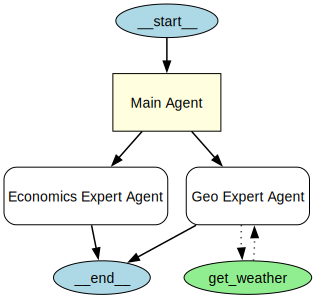

In [2]:
"""[Issue]
ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH
https://graphviz.org/download/

[Solve]
Mac
```bash
brew install graphviz
```

Ubuntu
```bash
apt-get update && apt-get install -y graphviz
```"""

from agents import Agent, Runner, SQLiteSession, function_tool
from agents.extensions.visualization import draw_graph
from pydantic import BaseModel

session = SQLiteSession("user_1", "ai-memory.db")


class Answer(BaseModel):
    answer: str
    background_explanation: str


@function_tool
def get_weather():
    return "30"


geaography_agent = Agent(
    name="Geo Expert Agent",
    instructions="You are a expert in geography, you answer questions related to them.",
    handoff_description="Use this to answer geography related questions.",
    tools=[
        get_weather,
    ],
    output_type=Answer,
)
economics_agent = Agent(
    name="Economics Expert Agent",
    instructions="You are a expert in economics, you answer questions related to them.",
    handoff_description="Use this to answer economics questions.",
)

main_agent = Agent(
    name="Main Agent",
    instructions="You are a user facing agent. Transfer to the agent most capable of answering the user's question.",
    handoffs=[
        economics_agent,
        geaography_agent,
    ],
)

draw_graph(main_agent)

In [3]:
result = await Runner.run(
    main_agent,
    "What is the capital of Thailand's northen province.",
    session=session,
)

print(result.last_agent.name)
print(result.final_output)

Main Agent
Thailand’s northernmost province is **Chiang Rai**. The capital city of Chiang Rai province is also called **Chiang Rai**.

If you meant another province in northern Thailand, or want details about other provinces or cities, let me know!
